In [64]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plot
import numpy as np
import scipy.stats as st

In [3]:
artists = pd.read_csv("artists-data.csv")
lyrics = pd.read_csv("lyrics-data.csv")

In [4]:
lyrics

,ALink,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379926,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [5]:
artists

,Artist,Genres,Songs,Popularity,Link
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/
1,Chiclete com Banana,Axé,268.0,3.8,/chiclete-com-banana/
2,Banda Eva,Axé; Romântico; Reggae,215.0,2.3,/banda-eva/
3,É O Tchan,Axé,129.0,1.6,/e-o-tchan/
4,Claudia Leitte,Pop; Axé; Romântico,167.0,1.5,/claudia-leitte/
...,...,...,...,...,...
4163,Miriam Makeba,World Music; Black Music; Blues,17.0,0.0,/miriam-makeba/
4164,Freddie Aguilar,World Music,61.0,0.0,/freddie-aguilar/
4165,Amadou & Mariam,World Music,14.0,0.0,/amadou-mariam/
4166,Magic System,World Music; Gospel/Religioso,16.0,0.0,/magic-system/


In [6]:
lyrics.rename(columns = {'ALink':'Link'}, inplace = True)
lyrics

,Link,SName,SLink,Lyric,language
0,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...
379926,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
379927,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
379928,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
379929,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [7]:
combined_data = pd.merge(artists, lyrics, on = "Link", how = "inner")
combined_data

,Artist,Genres,Songs,Popularity,Link,SName,SLink,Lyric,language
0,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Arerê,/ivete-sangalo/arere.html,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Se Eu Não Te Amasse Tanto Assim,/ivete-sangalo/se-eu-nao-te-amasse-tanto-assim...,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Céu da Boca,/ivete-sangalo/chupa-toda.html,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Quando A Chuva Passar,/ivete-sangalo/quando-a-chuva-passar.html,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Pop; Axé; Romântico,313.0,4.4,/ivete-sangalo/,Sorte Grande,/ivete-sangalo/sorte-grande.html,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/,The Waiting,/clegg-johnny/the-waiting.html,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/,Too Early For The Sky,/clegg-johnny/too-early-for-the-sky.html,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/,Warsaw 1943 (I Never Betrayed The Revolution),/clegg-johnny/warsaw-1943-i-never-betrayed-the...,"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,34.0,0.0,/clegg-johnny/,When The System Has Fallen,/clegg-johnny/when-the-system-has-fallen.html,Sweat in the heat for days on end\nwaiting for...,en


In [8]:
combined_data.drop(['Songs', 'Link', 'SLink'], axis=1, inplace=True)
combined_data

,Artist,Genres,Popularity,SName,Lyric,language
0,Ivete Sangalo,Pop; Axé; Romântico,4.4,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Pop; Axé; Romântico,4.4,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Pop; Axé; Romântico,4.4,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Pop; Axé; Romântico,4.4,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Pop; Axé; Romântico,4.4,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,0.0,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,0.0,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,0.0,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,0.0,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [9]:
combined_data.rename(columns = {'SName':'Song Title'}, inplace = True)
combined_data

,Artist,Genres,Popularity,Song Title,Lyric,language
0,Ivete Sangalo,Pop; Axé; Romântico,4.4,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Pop; Axé; Romântico,4.4,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Pop; Axé; Romântico,4.4,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Pop; Axé; Romântico,4.4,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Pop; Axé; Romântico,4.4,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,0.0,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,0.0,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,0.0,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,0.0,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [10]:
combined_data.dropna
combined_data

,Artist,Genres,Popularity,Song Title,Lyric,language
0,Ivete Sangalo,Pop; Axé; Romântico,4.4,Arerê,"Tudo o que eu quero nessa vida,\nToda vida, é\...",pt
1,Ivete Sangalo,Pop; Axé; Romântico,4.4,Se Eu Não Te Amasse Tanto Assim,Meu coração\nSem direção\nVoando só por voar\n...,pt
2,Ivete Sangalo,Pop; Axé; Romântico,4.4,Céu da Boca,É de babaixá!\nÉ de balacubaca!\nÉ de babaixá!...,pt
3,Ivete Sangalo,Pop; Axé; Romântico,4.4,Quando A Chuva Passar,Quando a chuva passar\n\nPra quê falar\nSe voc...,pt
4,Ivete Sangalo,Pop; Axé; Romântico,4.4,Sorte Grande,A minha sorte grande foi você cair do céu\nMin...,pt
...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,0.0,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,0.0,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,0.0,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,0.0,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [11]:
taylor_swift = combined_data.loc[combined_data['Artist'] == "Taylor Swift"]
taylor_swift

,Artist,Genres,Popularity,Song Title,Lyric,language
30908,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,Lover,We could leave the Christmas lights up 'til Ja...,en
30909,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,Blank Space,"Nice to meet you, where you been?\nI could sho...",en
30910,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,cardigan,"Vintage tee, brand new phone\nHigh heels on co...",en
30911,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,Shake It Off,I stay out too late\nGot nothing in my brain\n...,en
30912,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,All Too Well,I walked through the door with you\nThe air wa...,en
...,...,...,...,...,...,...
31290,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,You Need To Calm Down/ Lover (VMAs 2019),You are somebody that I don't know\nBut you're...,en
31291,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,You're Not Sorry,All this time I was wasting hoping you would c...,en
31292,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,You're Not Sorry (Taylor's Version),All this time I was wasting hoping you would c...,en
31293,Taylor Swift,Pop; Romântico; Pop/Rock,72.7,Your Anything,"Bet you lie awake at night,\nTrying to make up...",en


In [12]:
english_songs = combined_data.loc[combined_data['language'] == "en"]
english_songs

,Artist,Genres,Popularity,Song Title,Lyric,language
69,Ivete Sangalo,Pop; Axé; Romântico,4.4,Careless Whisper,I feel so unsure\nAs I take your hand and lead...,en
86,Ivete Sangalo,Pop; Axé; Romântico,4.4,Could You Be Loved / Citação Musical do Rap: S...,"Don't let them fool, ya\nOr even try to school...",en
88,Ivete Sangalo,Pop; Axé; Romântico,4.4,Cruisin' (Part. Saulo),"Baby, let's cruise, away from here\nDon't be c...",en
111,Ivete Sangalo,Pop; Axé; Romântico,4.4,Easy,"Know it sounds funny\nBut, I just can't stand ...",en
140,Ivete Sangalo,Pop; Axé; Romântico,4.4,For Your Babies (The Voice cover),You've got that look again\nThe one I hoped I ...,en
...,...,...,...,...,...,...
378983,Johnny Clegg,World Music; Gospel/Religioso,0.0,The Waiting,Chorus\nHere we stand waiting on the plain\nDa...,en
378984,Johnny Clegg,World Music; Gospel/Religioso,0.0,Too Early For The Sky,I nearly disappeared into the mouth of a croco...,en
378985,Johnny Clegg,World Music; Gospel/Religioso,0.0,Warsaw 1943 (I Never Betrayed The Revolution),"Amambuka, amambuka azothengisa izwe lakithi, i...",en
378986,Johnny Clegg,World Music; Gospel/Religioso,0.0,When The System Has Fallen,Sweat in the heat for days on end\nwaiting for...,en


In [20]:
english_songs['Lyric'].str.contains('shit|bitch|fuck').sum()

24283

In [119]:
pop = combined_data.loc[combined_data['Genres'].str.contains("Pop", na=False)]
hiphop = combined_data.loc[combined_data['Genres'].str.contains("Hip Hop", na=False)]
rock = combined_data.loc[combined_data['Genres'].str.contains("Rock", na=False)]
gospel = combined_data.loc[combined_data['Genres'].str.contains("Gospel", na=False)]
RnB = combined_data.loc[combined_data['Genres'].str.contains("R&B", na=False)]
country = combined_data.loc[combined_data['Genres'].str.contains("Country", na=False)]
dance = combined_data.loc[combined_data['Genres'].str.contains("Dance", na=False)]
dance

,Artist,Genres,Popularity,Song Title,Lyric,language
4060,Banda Beijo,Axé; Dance; Pop/Rock,0.0,Bate Lata,Era um menino tocador\nque dispensou o agogô\n...,pt
4061,Banda Beijo,Axé; Dance; Pop/Rock,0.0,Apaixonada,Apaixonada\nAinda estou completamente apaixona...,pt
4062,Banda Beijo,Axé; Dance; Pop/Rock,0.0,Baianidade Nagô,A7+\nJá pintou verão\nF#m\nCalor no coração\nB...,pt
4063,Banda Beijo,Axé; Dance; Pop/Rock,0.0,O Arrastão,É vendaval\nÉ som de Brow\nPuxa a menina\nTira...,pt
4064,Banda Beijo,Axé; Dance; Pop/Rock,0.0,Aconteceu,"Aconteceu, você virou paixão\nBateu os tambore...",pt
...,...,...,...,...,...,...
378417,Gipsy Kings,World Music; Dance; Regional,1.0,Tu Quieres Volver,Tú quieres volver\nY no te veo más\nTú quieres...,es
378418,Gipsy Kings,World Music; Dance; Regional,1.0,Un Amor (translate),A love\nA love vivio\nCrying and me decia\nThe...,en
378419,Gipsy Kings,World Music; Dance; Regional,1.0,Una Rumba Por Aqui,Una rumba por aqui\nUna rumba por alla\nCuando...,es
378420,Gipsy Kings,World Music; Dance; Regional,1.0,Vamos a Bailar,Regala me\nTu Viente a&ntilde;os\nRegala me\nS...,es


In [121]:
pop_profanity = pop['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
hiphop_profanity = hiphop['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
rock_profanity = rock['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
gospel_profanity = gospel['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
RnB_profanity = RnB['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
country_profanity = country['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()
dance_profanity = dance['Lyric'].str.contains(' shit |bitch|fuck| ass ').sum()

In [122]:
profanity_counts = pd.DataFrame(
    {"Genre":["Pop", "HipHop", "Rock", "Gospel", "RnB", "Country", "Dance"],
        "Count":[pop_profanity, hiphop_profanity, rock_profanity, gospel_profanity, RnB_profanity, country_profanity, dance_profanity]
     })
profanity_counts.set_index("Genre",drop=True,inplace=True)
profanity_counts = profanity_counts.sort_values(by="Count", ascending=False)
profanity_counts

,Count
Genre,
HipHop,12178
Rock,6123
Pop,3766
RnB,2521
Dance,1061
Country,82
Gospel,28


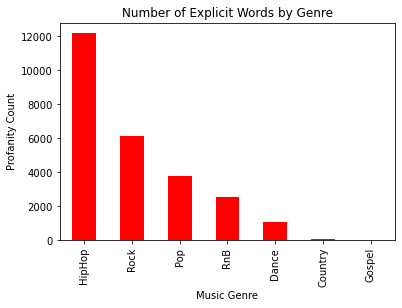

In [131]:
profanity_counts.plot(kind = 'bar',
                                xlabel="Music Genre",
                                ylabel="Profanity Count",
                                legend=False,
                                use_index=True,
                                color='red')
plot.title("Number of Explicit Words by Genre")
plot.show()

In [129]:
pop_god = pop['Lyric'].str.contains(' god | dios | deus ').sum()
hiphop_god = hiphop['Lyric'].str.contains(' god | dios | deus ').sum()
rock_god = rock['Lyric'].str.contains(' god | dios | deus ').sum()
gospel_god = gospel['Lyric'].str.contains(' god | dios | deus ').sum()
RnB_god = RnB['Lyric'].str.contains(' god | dios | deus ').sum()
country_god = country['Lyric'].str.contains(' god | dios | deus ').sum()
dance_god = dance['Lyric'].str.contains(' god | dios | deus ').sum()

In [130]:
god_counts = pd.DataFrame(
    {"Genre":["Pop", "HipHop", "Rock", "Gospel", "RnB", "Country", "Dance"],
        "Count":[pop_god, hiphop_god, rock_god, gospel_god, RnB_god, country_god, dance_god]
     })
god_counts.set_index("Genre",drop=True,inplace=True)
god_counts = god_counts.sort_values(by="Count", ascending=False)
god_counts

,Count
Genre,
Rock,1312
Gospel,1050
HipHop,913
Pop,692
RnB,172
Dance,159
Country,138


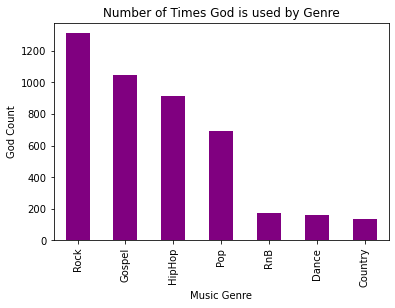

In [132]:
god_counts.plot(kind = 'bar',
                                xlabel="Music Genre",
                                ylabel="God Count",
                                legend=False,
                                use_index=True,
                                color='purple')
plot.title("Number of Times God is used by Genre")
plot.show()

In [134]:
profanity_vs_god = pd.merge(profanity_counts, god_counts, on='Genre')
profanity_vs_god.rename(columns = {'Count_x':'Profanity_Count', 'Count_y':'God_Count'}, inplace = True)
profanity_vs_god

,Profanity_Count,God_Count
Genre,,
HipHop,12178,913
Rock,6123,1312
Pop,3766,692
RnB,2521,172
Dance,1061,159
Country,82,138
Gospel,28,1050


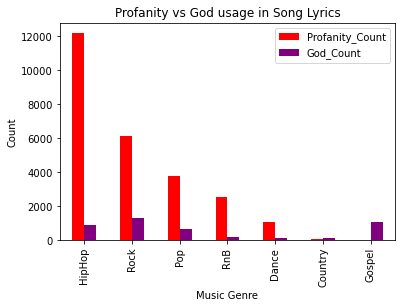

In [137]:
profanity_vs_god.plot(kind = 'bar',
                                xlabel="Music Genre",
                                ylabel="Count",
                                use_index=True,
                                color=['red', 'purple'])
plot.title("Profanity vs God usage in Song Lyrics")
plot.show()